In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_pickle("econ_sample.pkl") # Load your tweets
df.head()
df.columns

,tweetid,userid,screen_name,date,lang,state,country,tweet_type,friends_count,verified,hashtag,rt_screen,rt_userid,rt_text,sent_vader,qtd_screen,qtd_userid,qtd_text
15204,1456699658852503552,758103579286581248,janvinjoey,2021-11-05 19:07:17+00:00,en,NJ,United States,retweeted_tweet_without_comment,8080,False,[],TomiLahren,4.686470e+08,My dad is now one of those people who is force...,-0.8852,NaN,NaN,NaN
106384,1391133712335753216,48149612,coco_roberts13,2021-05-08 20:51:37+00:00,en,NaN,NaN,retweeted_tweet_without_comment,852,False,[],SenSanders,2.944231e+07,Providing an extra $300 a week in unemployment...,-0.1813,NaN,NaN,NaN
81608,1334342185605615616,381244658,0lufem,2020-12-03 03:42:22+00:00,en,NaN,NaN,retweeted_tweet_without_comment,341,False,[],Ilhan,1.082334e+18,It’s been 200 days since the House passed the ...,0.9251,NaN,NaN,NaN
56475,1282109428645294080,112902058,InvestWatchBlog,2020-07-12 00:28:02+00:00,en,NaN,United States,original,480,False,[],NaN,NaN,NaN,-0.4404,NaN,NaN,NaN
8381,1475859762071982080,361703035,Unbreakable_B,2021-12-28 16:02:42+00:00,en,MA,United States,retweeted_tweet_without_comment,544,False,[],foxstrology,1.014295e+18,no free tests. no free masks. no lockdown. no ...,-0.7650,NaN,NaN,NaN


Index(['tweetid', 'userid', 'screen_name', 'date', 'lang', 'state', 'country',
       'tweet_type', 'friends_count', 'verified', 'hashtag', 'rt_screen',
       'rt_userid', 'rt_text', 'sent_vader', 'qtd_screen', 'qtd_userid',
       'qtd_text'],
      dtype='object')

In [4]:
df['state'].value_counts()

state
CA    46852
NY    28182
TX    27681
FL    22694
IL    12104
PA    10196
OH     9654
DC     9105
GA     8828
MI     8362
NC     7902
MA     7860
AZ     7558
NJ     6944
WA     6795
VA     6346
CO     6224
OR     5610
MD     5175
TN     5055
MN     4453
IN     4153
WI     3661
NV     3516
SC     3240
MO     3092
KY     2895
AL     2811
CT     2638
OK     2522
IA     1996
KS     1962
AR     1719
UT     1602
NM     1579
LA     1368
HI     1299
ME     1281
NE     1163
MS     1142
WV     1120
NH     1090
ID     1042
RI      936
MT      842
DE      813
AK      707
VT      638
SD      496
ND      329
WY      322
Name: count, dtype: int64

In [5]:
df['verified'].value_counts()

verified
False    975392
True      24608
Name: count, dtype: int64

In [11]:
df['friends_count'].sort_values()

27012         0
3285          0
36728         0
91766         0
83746         0
          ...  
25527    566823
38572    609833
53945    616191
41811    616484
85524    629925
Name: friends_count, Length: 1000000, dtype: int64

In [10]:
df['sent_vader'].sort_values()

61558    -0.9973
123815   -0.9965
137713   -0.9965
75073    -0.9965
160999   -0.9965
           ...  
48998     0.9975
103747    0.9983
34295     0.9988
77315     0.9990
96576     0.9996
Name: sent_vader, Length: 1000000, dtype: float64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='friends_count', ylabel='sent_vader'>

Text(0.5, 1.0, 'Scatter Plot of Friends Count vs Sentiment (Vader)')

Text(0.5, 0, 'Friends Count')

Text(0, 0.5, 'Sentiment (Vader)')

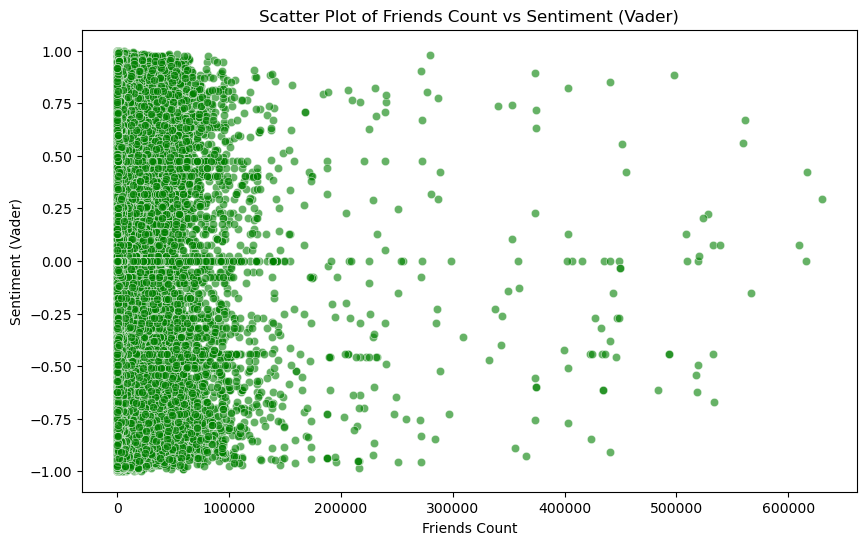

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='friends_count', y='sent_vader', color='green', alpha=0.6)
plt.title("Scatter Plot of Friends Count vs Sentiment (Vader)")
plt.xlabel("Friends Count")
plt.ylabel("Sentiment (Vader)")
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Hexbin Plot of Friends Count vs Sentiment (Vader)')

Text(0.5, 0, 'Friends Count')

Text(0, 0.5, 'Sentiment (Vader)')

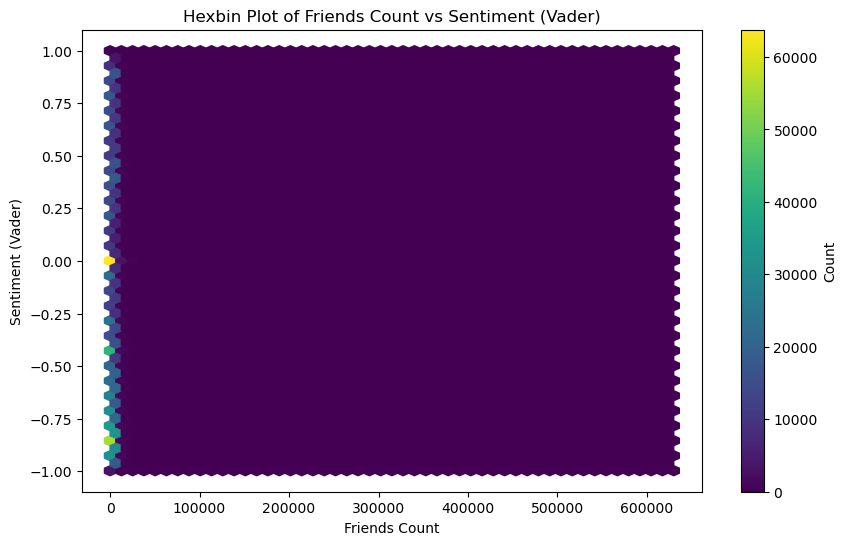

In [14]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['friends_count'], df['sent_vader'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.title("Hexbin Plot of Friends Count vs Sentiment (Vader)")
plt.xlabel("Friends Count")
plt.ylabel("Sentiment (Vader)")
plt.show()

In [17]:
#code to add column of political affilation depending on the state
political_affil_state = {
    'MT': 'Red', 'ID': 'Red', 'UT': 'Red', 'WY': 'Red',
    'SD': 'Red', 'ND': 'Red', 'NE': 'Red', 'IA': 'Red',
    'MO': 'Red', 'KS': 'Red', 'OK': 'Red', 'TX': 'Red',
    'AR': 'Red', 'LA': 'Red', 'MS': 'Red', 'AL': 'Red',
    'TN': 'Red', 'KY': 'Red', 'IN': 'Red', 'OH': 'Red',
    'WV': 'Red', 'NC': 'Red', 'SC': 'Red', 'FL': 'Red', 'AK': 'Red', #Red states
    
    'WA': 'Blue', 'OR': 'Blue', 'NV': 'Blue', 'CA': 'Blue',
    'NM': 'Blue', 'CO': 'Blue', 'MN': 'Blue', 'IL': 'Blue',
    'NY': 'Blue', 'VA': 'Blue', 'NJ': 'Blue', 'MD': 'Blue',
    'DE': 'Blue', 'CT': 'Blue', 'MA': 'Blue', 'RI': 'Blue',
    'NH': 'Blue', 'VT': 'Blue', 'ME': 'Blue', 'HI': 'Blue', #Blue states
    
    'AZ': 'Flip', 'WI': 'Flip', 'MI': 'Flip', 'GA': 'Flip', 
    'PA': 'Flip'} #Flip states

def get_political_affil(state):
    #default to 'Unknown' if the state abbreviation is not found in the mapping
    return political_affil_state.get(state, 'Unknown')
df['political_affil'] = df['state'].apply(get_political_affil)
df['political_affil']

15204        Blue
106384    Unknown
81608     Unknown
56475     Unknown
8381         Blue
           ...   
136351    Unknown
17371        Flip
108753        Red
31214     Unknown
58332     Unknown
Name: political_affil, Length: 1000000, dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode 'political_affil' as integers
le = LabelEncoder()
df['political_affil_encoded'] = le.fit_transform(df['political_affil'])

# Define features and target
X = df[['sent_vader']]
y = df['political_affil_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

Accuracy: 0.70528
Classification Report:
               precision    recall  f1-score   support

        Blue       0.00      0.00      0.00     29951
        Flip       0.00      0.00      0.00      7682
         Red       0.00      0.00      0.00     21311
     Unknown       0.71      1.00      0.83    141056

    accuracy                           0.71    200000
   macro avg       0.18      0.25      0.21    200000
weighted avg       0.50      0.71      0.58    200000



/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

/var/folders/p9/zhd87k2j2b1224y0ny7xcjx40000gn/T/ipykernel_13496/2506389327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='political_affil', y='sent_vader', palette="Set2")


<Axes: xlabel='political_affil', ylabel='sent_vader'>

Text(0.5, 1.0, 'Sentiment Distribution by Political Affiliation')

Text(0.5, 0, 'Political Affiliation')

Text(0, 0.5, 'Sentiment Score (Vader)')

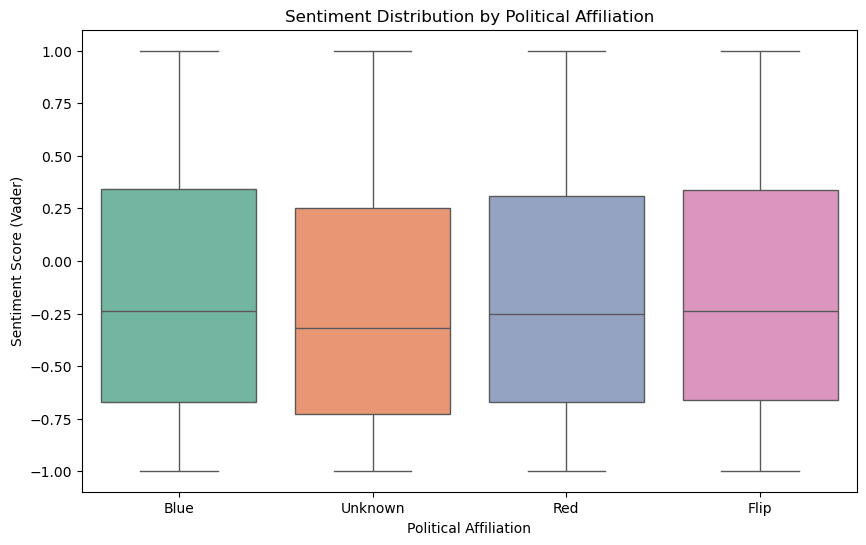

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='sent_vader', ylabel='Count'>

Text(0.5, 1.0, 'Sentiment Score Distribution by Political Affiliation')

Text(0.5, 0, 'Sentiment Score (Vader)')

Text(0, 0.5, 'Density')

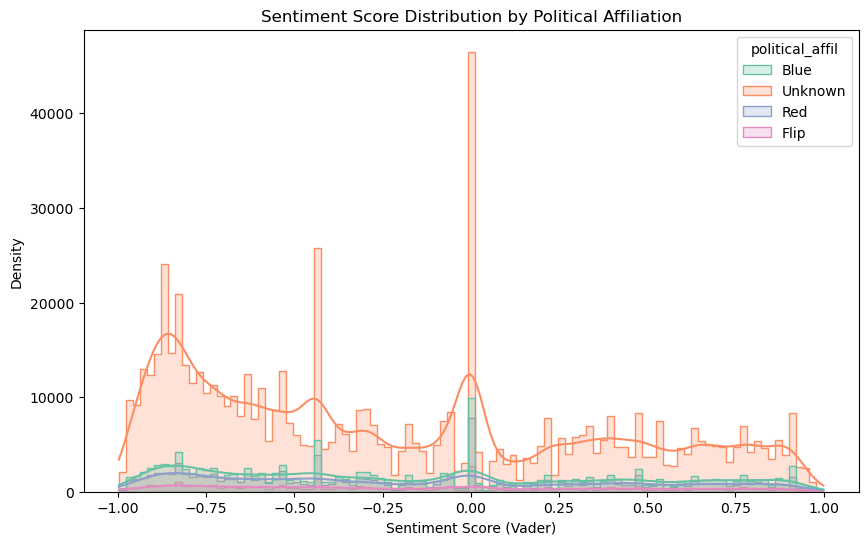

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to show distribution of sentiment by political affiliation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='political_affil', y='sent_vader', palette="Set2")
plt.title("Sentiment Distribution by Political Affiliation")
plt.xlabel("Political Affiliation")
plt.ylabel("Sentiment Score (Vader)")
plt.show()

# Histogram to check sentiment distribution for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sent_vader', hue='political_affil', kde=True, element="step", palette="Set2")
plt.title("Sentiment Score Distribution by Political Affiliation")
plt.xlabel("Sentiment Score (Vader)")
plt.ylabel("Density")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df[['friends_count']]
y = df['sent_vader']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


LinearRegression()

Mean Squared Error: 0.3234846328718821
R-squared: 0.00029441277080832773


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Friends Count')

Text(0, 0.5, 'Sentiment Score (Vader)')

Text(0.5, 1.0, 'Friends Count vs Sentiment Score')

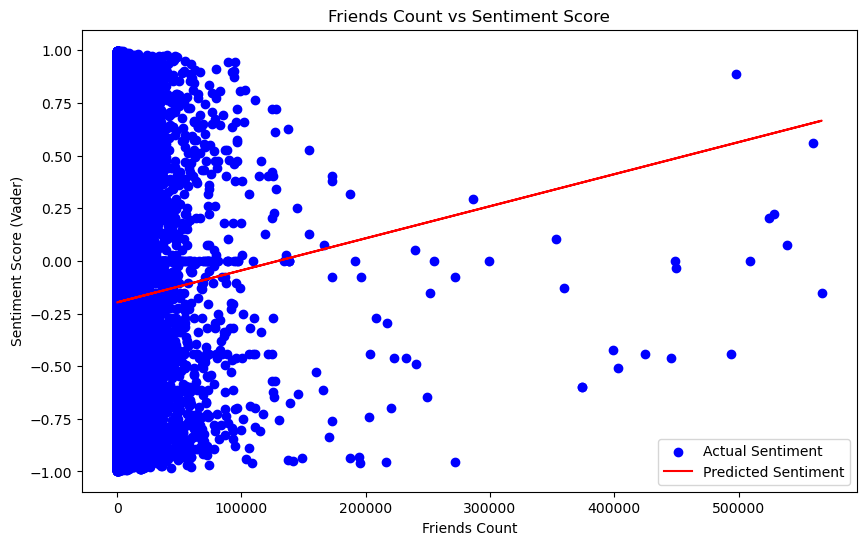

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sentiment')
plt.plot(X_test, y_pred, color='red', label='Predicted Sentiment')
plt.xlabel("Friends Count")
plt.ylabel("Sentiment Score (Vader)")
plt.title("Friends Count vs Sentiment Score")
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import Ridge, Lasso

# Instantiate Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Ridge Regression - MSE:", ridge_mse, ", R-squared:", ridge_r2)
print("Lasso Regression - MSE:", lasso_mse, ", R-squared:", lasso_r2)

Ridge()

Lasso(alpha=0.1)

Ridge Regression - MSE: 0.32348463287188206 , R-squared: 0.0002944127708085498
Lasso Regression - MSE: 0.3234845988553891 , R-squared: 0.00029451789629098


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode the target variable
le = LabelEncoder()
df['political_affil_encoded'] = le.fit_transform(df['political_affil'])

# Define the features and target
X = df[['friends_count']]
y = df['political_affil_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the logistic regression model for multiclass classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.704855
Classification Report:
               precision    recall  f1-score   support

        Blue       0.20      0.00      0.00     29951
        Flip       0.00      0.00      0.00      7682
         Red       0.00      0.00      0.00     21311
     Unknown       0.71      1.00      0.83    141056

    accuracy                           0.70    200000
   macro avg       0.23      0.25      0.21    200000
weighted avg       0.53      0.70      0.58    200000

Confusion Matrix:
 [[    36      0      8  29907]
 [     5      0      0   7677]
 [    25      0      0  21286]
 [   116      0      5 140935]]


/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='political_affil', ylabel='friends_count'>

Text(0.5, 1.0, 'Distribution of Friends Count by Political Affiliation')

Text(0.5, 0, 'Political Affiliation')

Text(0, 0.5, 'Friends Count')

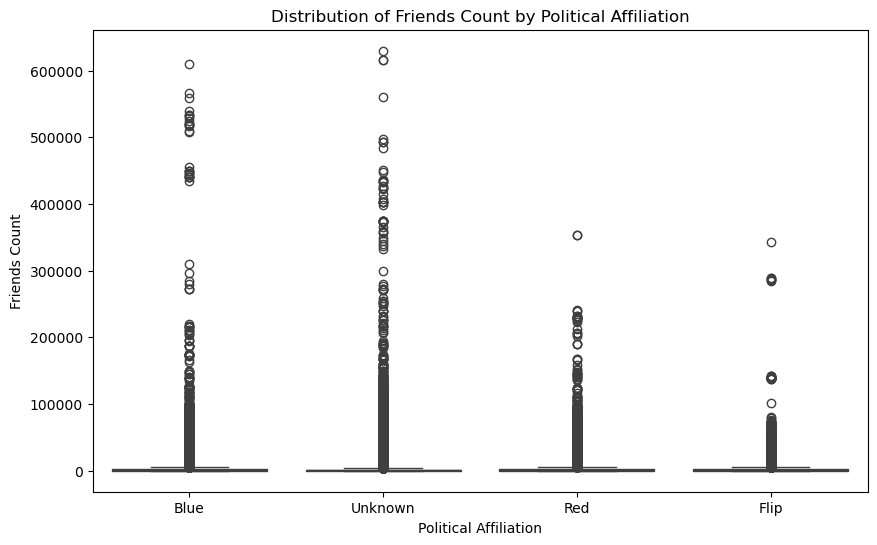

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='political_affil', y='friends_count', data=df)
plt.title("Distribution of Friends Count by Political Affiliation")
plt.xlabel("Political Affiliation")
plt.ylabel("Friends Count")
plt.show()

In [25]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = df['friends_count'].quantile(0.25)
Q3 = df['friends_count'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['friends_count'] >= lower_bound) & (df['friends_count'] <= upper_bound)]


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='political_affil', ylabel='friends_count'>

Text(0.5, 1.0, 'Filtered Distribution of Friends Count by Political Affiliation')

Text(0.5, 0, 'Political Affiliation')

Text(0, 0.5, 'Friends Count')

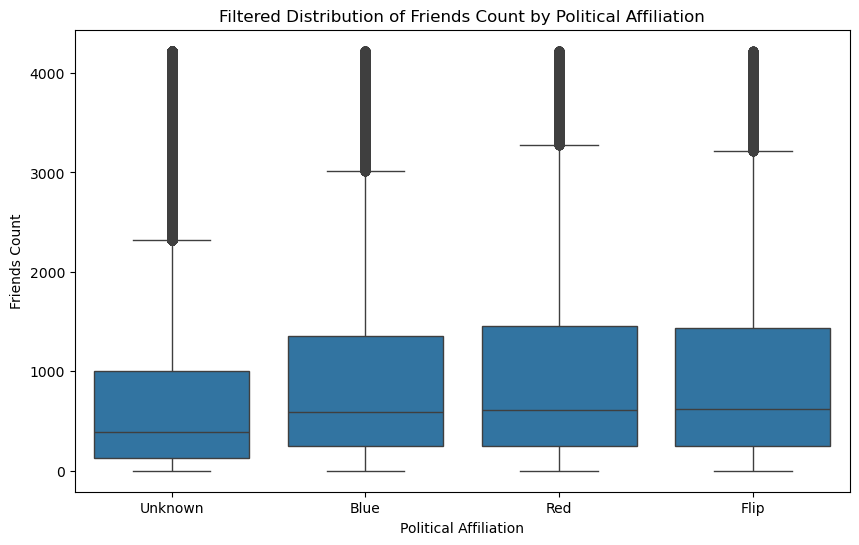

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='political_affil', y='friends_count', data=df_filtered)
plt.title("Filtered Distribution of Friends Count by Political Affiliation")
plt.xlabel("Political Affiliation")
plt.ylabel("Friends Count")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Convert 'verified' to binary if necessary (assuming it's already in binary form here)

# Step 2: Encode the target variable 'political_affil'
label_encoder = LabelEncoder()
df['political_affil_encoded'] = label_encoder.fit_transform(df['political_affil'])

# Define features and target
X = df[['verified']]
y = df['political_affil_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate and fit the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(confusion_matrix(y_test, y_pred))


/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

              precision    recall  f1-score   support

        Blue       0.00      0.00      0.00     29951
        Flip       0.00      0.00      0.00      7682
         Red       0.00      0.00      0.00     21311
     Unknown       0.71      1.00      0.83    141056

    accuracy                           0.71    200000
   macro avg       0.18      0.25      0.21    200000
weighted avg       0.50      0.71      0.58    200000

[[     0      0      0  29951]
 [     0      0      0   7682]
 [     0      0      0  21311]
 [     0      0      0 141056]]


/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/qss20/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='verified', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Political Affiliation by Twitter Verification Status')

Text(0.5, 0, 'Twitter Verification Status')

Text(0, 0.5, 'Count')

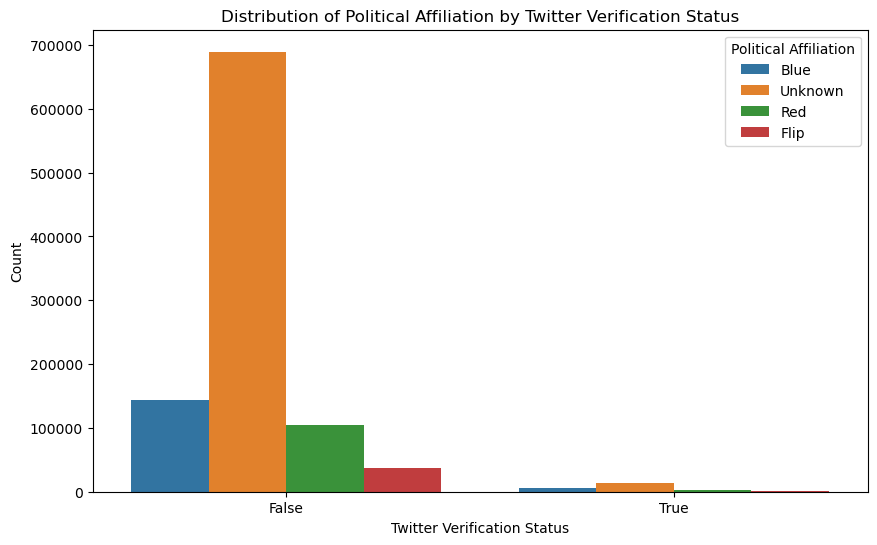

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='verified', hue='political_affil', data=df)
plt.title("Distribution of Political Affiliation by Twitter Verification Status")
plt.xlabel("Twitter Verification Status")
plt.ylabel("Count")
plt.legend(title="Political Affiliation")
plt.show()